# Cluster Analysis using KMeans
How does male life expectancy, female life expectancy, and infant mortality cluster according to GDP across nations in the UN?

#### Load, overview, and clean the data.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from numpy import array, argmin
from scipy.cluster.vq import kmeans
from scipy.spatial.distance import euclidean

In [2]:
#https://github.com/Thinkful-Ed/curric-data-001-data-sets/blob/master/un/un.csv
df = pd.read_csv('un.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 14 columns):
country                   207 non-null object
region                    207 non-null object
tfr                       197 non-null float64
contraception             144 non-null float64
educationMale             76 non-null float64
educationFemale           76 non-null float64
lifeMale                  196 non-null float64
lifeFemale                196 non-null float64
infantMortality           201 non-null float64
GDPperCapita              197 non-null float64
economicActivityMale      165 non-null float64
economicActivityFemale    165 non-null float64
illiteracyMale            160 non-null float64
illiteracyFemale          160 non-null float64
dtypes: float64(12), object(2)
memory usage: 22.7+ KB


In [3]:
print('There are {} countries in this dataset.'.format(len(df.country.value_counts())))

There are 207 countries in this dataset.


In [4]:
# Selecting columns:
df = df[['country','region','lifeMale','lifeFemale','infantMortality','GDPperCapita']]
# Removing lines with NA in any col
df = df.dropna(axis=0, how='any', subset=['lifeMale','lifeFemale','infantMortality','GDPperCapita'])

In [5]:
df.head()

,country,region,lifeMale,lifeFemale,infantMortality,GDPperCapita
0,Afghanistan,Asia,45.0,46.0,154.0,2848.0
1,Albania,Europe,68.0,74.0,32.0,863.0
2,Algeria,Africa,67.5,70.3,44.0,1531.0
5,Angola,Africa,44.9,48.1,124.0,355.0
7,Argentina,America,69.6,76.8,22.0,8055.0


#### Run KMeans for 1 to 10 clusters, make the determination of how many clusters to use.

In [6]:
K = array(range(1,11))
KM = [kmeans(df[['lifeMale','lifeFemale','infantMortality','GDPperCapita']].values,k) for k in K]

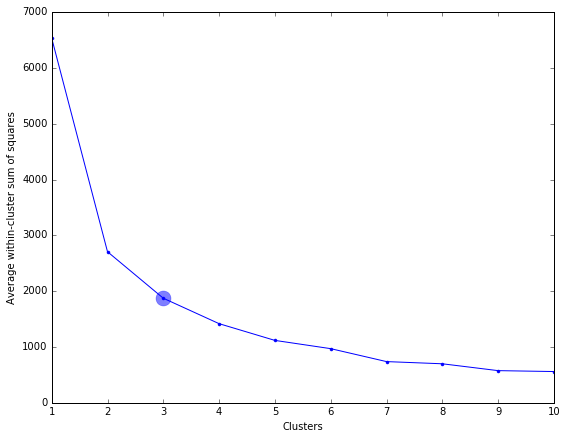

In [7]:
SoS = [i[1] for i in KM]
plt.figure(figsize=(9,7))
plt.plot(K,SoS,marker='.')
plt.xlabel('Clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.plot(3,KM[2][1],marker='o',ms=15.0,mfc='b',mec='b',alpha=0.5)

Plotting the number of clusters against the average within-cluster cum of squares, we begin to get diminishing returns at about 3 clusters. From here forward we'll group the countries into 3 clusters.

#### Re-run KMeans for the optimal number of clusters (3). Determine the closest centroid for each country, thereby clustering the countries.

In [8]:
KM = kmeans(df[['lifeMale','lifeFemale','infantMortality','GDPperCapita']].values,3)
KM

(array([[  7.43050000e+01,   8.02350000e+01,   6.60000000e+00,
           2.76644500e+04],
        [  6.02309353e+01,   6.46640288e+01,   5.61007194e+01,
           1.47384173e+03],
        [  7.18862069e+01,   7.75551724e+01,   1.37931034e+01,
           1.20441034e+04]]), 1874.0284870915732)

In [9]:
def distances(series):
    for i in range(3):
        series[i]=euclidean(series.loc[['lifeMale','lifeFemale','infantMortality','GDPperCapita']],KM[0][i])
    return series
    
df = pd.concat([df,pd.DataFrame(columns=list('012'))])    
df = df.apply(distances, axis=1)
df['cluster'] = df[[0,1,2]].idxmin(axis=1).astype(int)
df.head()

,0,1,2,GDPperCapita,country,infantMortality,lifeFemale,lifeMale,region,cluster
0,24816.928661,1377.851791,9197.265637,2848.0,Afghanistan,154.0,46.0,45.0,Asia,1
1,26801.463503,611.437632,11181.119513,863.0,Albania,32.0,74.0,68.0,Europe,1
2,26133.479536,59.144730,10513.150263,1531.0,Algeria,44.0,70.3,67.5,Africa,1
5,27309.737080,1121.127346,11689.691221,355.0,Angola,124.0,48.1,44.9,Africa,1
7,19609.456912,6581.264479,3989.112617,8055.0,Argentina,22.0,76.8,69.6,America,2


#### Plot the centroids and the data, observing how the newly defined groups are positioned around the centroids.

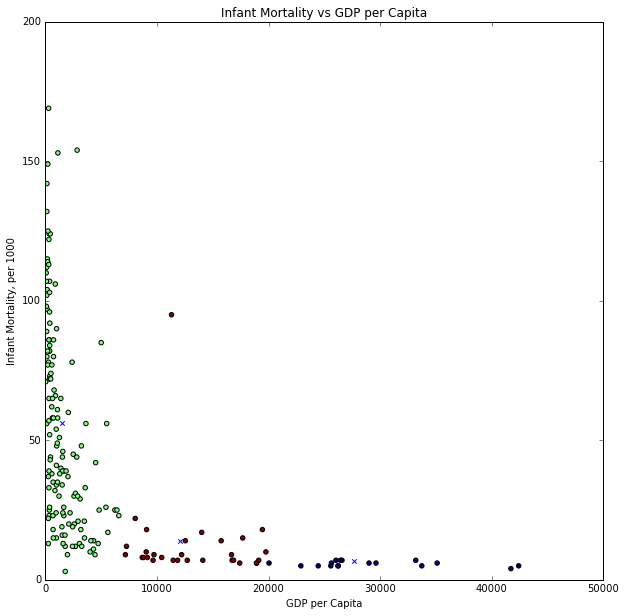

In [10]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(x=df['GDPperCapita'],y=df['infantMortality'],c=df['cluster'])
ax.set_xlim(0,50000)
ax.set_ylim(0,200)

x_centroids = [KM[0][0][3],KM[0][1][3],KM[0][2][3]]
y_centroids = [KM[0][0][2],KM[0][1][2],KM[0][2][2]]

ax.scatter(x_centroids,y_centroids,marker='x')

plt.title('Infant Mortality vs GDP per Capita')
plt.ylabel('Infant Mortality, per 1000')
plt.xlabel('GDP per Capita')

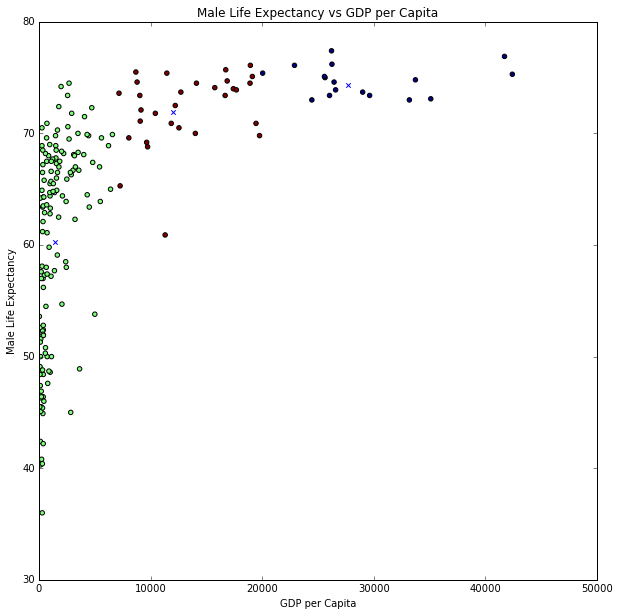

In [11]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(x=df['GDPperCapita'],y=df['lifeMale'],c=df['cluster'])
ax.set_xlim(0,50000)

x_centroids = [KM[0][0][3],KM[0][1][3],KM[0][2][3]]
y_centroids = [KM[0][0][0],KM[0][1][0],KM[0][2][0]]

ax.scatter(x_centroids,y_centroids,marker='x')

plt.title('Male Life Expectancy vs GDP per Capita')
plt.ylabel('Male Life Expectancy')
plt.xlabel('GDP per Capita')

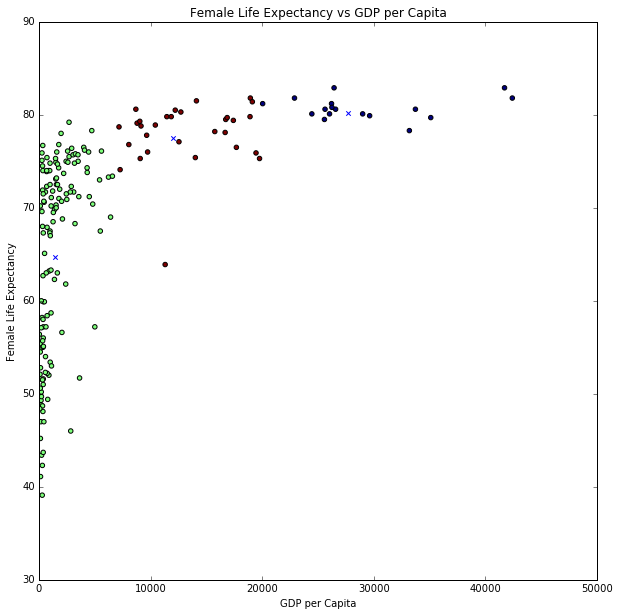

In [12]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(x=df['GDPperCapita'],y=df['lifeFemale'],c=df['cluster'])
ax.set_xlim(0,50000)

x_centroids = [KM[0][0][3],KM[0][1][3],KM[0][2][3]]
y_centroids = [KM[0][0][1],KM[0][1][1],KM[0][2][1]]

ax.scatter(x_centroids,y_centroids,marker='x')

plt.title('Female Life Expectancy vs GDP per Capita')
plt.ylabel('Female Life Expectancy')
plt.xlabel('GDP per Capita')